In [18]:
import os
import pandas as pd
# import matplotlib.pyplot as plt

fut_ny_open = pd.read_csv(os.path.join('..', 'data', 'processed', 'futures', 'futures_usd_notional_ny_open.csv'), index_col=0)
fut_dom_close = pd.read_csv(os.path.join('..', 'data', 'processed', 'futures', 'futures_usd_notional_domestic_close.csv'), index_col=0)
fut_ny_close = pd.read_csv(os.path.join('..', 'data', 'processed', 'futures', 'futures_usd_notional_ny_close.csv'), index_col=0)
fut_fixed_time = pd.read_csv(os.path.join('..', 'data', 'processed', 'futures', 'futures_usd_notional_fixed_time.csv'), index_col=0)

adr_ny_open = pd.read_csv(os.path.join('..', 'data', 'raw', 'adrs','adr_PX_OPEN_adjust_none.csv'), index_col=0)
adr_dom_close = pd.read_csv(os.path.join('..', 'data', 'processed', 'adrs','adr_mid_at_ord_auction_adjust_none.csv'), index_col=0)
adr_ny_close = pd.read_csv(os.path.join('..', 'data', 'raw', 'adrs','adr_PX_LAST_adjust_none.csv'), index_col=0)
adr_fixed_time = pd.read_csv(os.path.join('..', 'data', 'processed', 'adrs','daily_mid_for_cov.csv'), index_col=0)

In [28]:
fut_dom_close

,BUD,AEG,ARGX,ASML,AZN,BCS,BTI,BBVA,BP,DEO,...,SAN,SAP,SHEL,SNN,TS,TTE,UL,VOD,WPP,DB
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,39210.13600,39210.13600,39210.13600,39210.13600,95402.56950,95402.56950,95402.56950,39210.13600,95402.56950,95402.56950,...,39210.13600,39210.13600,95402.56950,95402.56950,39210.13600,39210.13600,95402.56950,95402.56950,95402.56950,39210.13600
2020-01-03,38981.52170,38981.52170,38981.52170,38981.52170,95298.71359,95298.71359,95298.71359,38981.52170,95298.71359,95298.71359,...,38981.52170,38981.52170,95298.71359,95298.71359,38981.52170,38981.52170,95298.71359,95298.71359,95298.71359,38981.52170
2020-01-06,38820.16392,38820.16392,38820.16392,38820.16392,95186.99099,95186.99099,95186.99099,38820.16392,95186.99099,95186.99099,...,38820.16392,38820.16392,95186.99099,95186.99099,38820.16392,38820.16392,95186.99099,95186.99099,95186.99099,38820.16392
2020-01-07,38721.81696,38721.81696,38721.81696,38721.81696,94813.34310,94813.34310,94813.34310,38721.81696,94813.34310,94813.34310,...,38721.81696,38721.81696,94813.34310,94813.34310,38721.81696,38721.81696,94813.34310,94813.34310,94813.34310,38721.81696
2020-01-08,38804.30961,38804.30961,38804.30961,38804.30961,94712.79272,94712.79272,94712.79272,38804.30961,94712.79272,94712.79272,...,38804.30961,38804.30961,94712.79272,94712.79272,38804.30961,38804.30961,94712.79272,94712.79272,94712.79272,38804.30961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,NaN,NaN,NaN,NaN,101113.79439,101113.79439,101113.79439,NaN,101113.79439,101113.79439,...,NaN,NaN,101113.79439,101113.79439,NaN,NaN,101113.79439,101113.79439,101113.79439,NaN
2024-05-01,NaN,NaN,NaN,NaN,103615.81815,103615.81815,103615.81815,NaN,103615.81815,103615.81815,...,NaN,NaN,103615.81815,103615.81815,NaN,NaN,103615.81815,103615.81815,103615.81815,NaN
2024-12-24,NaN,NaN,NaN,NaN,102921.30373,102921.30373,102921.30373,NaN,102921.30373,102921.30373,...,NaN,NaN,102921.30373,102921.30373,NaN,NaN,102921.30373,102921.30373,102921.30373,NaN


HLN -0.38220540203938763
NWG -0.513594026199063
BCS -0.5652828568453062
SAN -0.4192255992326973
SNN -0.4724141003976584
E -0.3320156411867963
TS -0.5185971747921779
AZN -0.3912370028984637
NGG -0.24351604394734663
SNY -0.2943371746649156
HSBC -0.07587125745389135
RIO -0.37121264184200947
IHG -0.5510681971464837
FMS -0.22340771462144812
SHEL -0.4405030487909811
BBVA -0.45228532018062517
DB -0.4546169105243548
DEO -0.2832318956917894
AEG -0.445290412510591
BP -0.33406971729593726
ARGX -0.5641584911594646
RELX -0.2731297664584947


/tmp/ipykernel_407732/3525119420.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


NOK -0.31585176167225915
PSO -0.19875509739641647
PHG -0.2581383964508483
BUD -0.2599070597641886
RYAAY -0.5395710664338698
ASML -0.675543082913493
PUK -0.5667096924808955
WPP -0.4591597506720142
BTI -0.26146311765151525
ING -0.31537515511417147
SAP -0.4072491083601906
LYG -0.5599129894745286
TTE 0.008163407210445844
UL -0.1865270073010876
GSK -0.39588939525838374
VOD -0.27494752599101546
RTO -0.5876997032248651


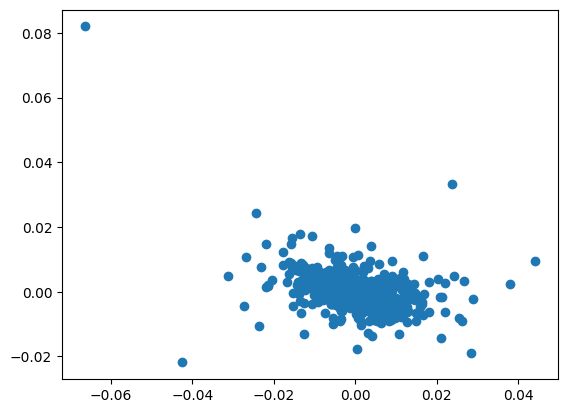

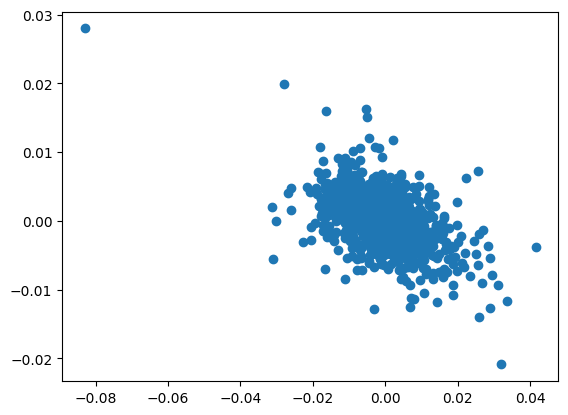

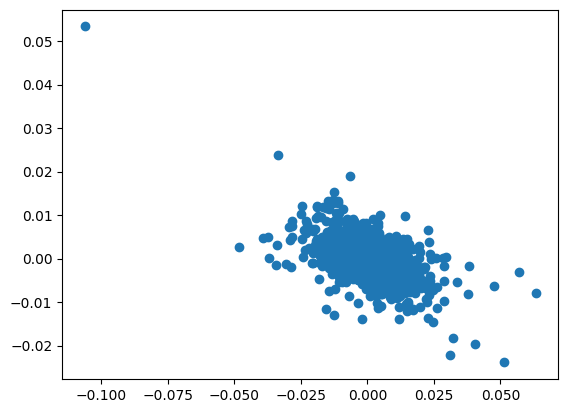

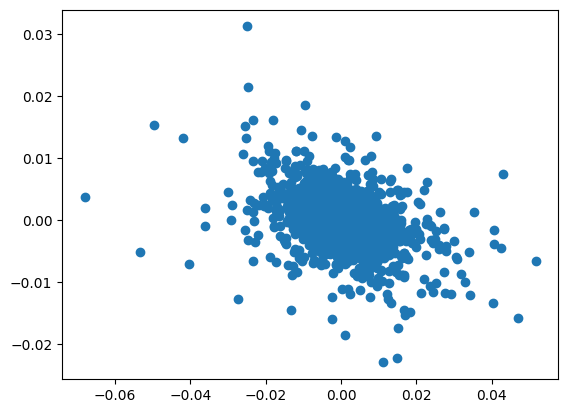

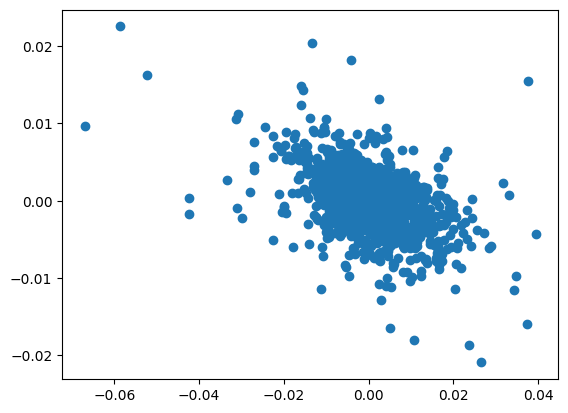

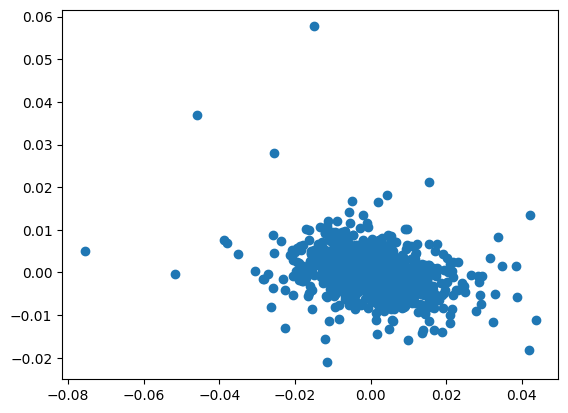

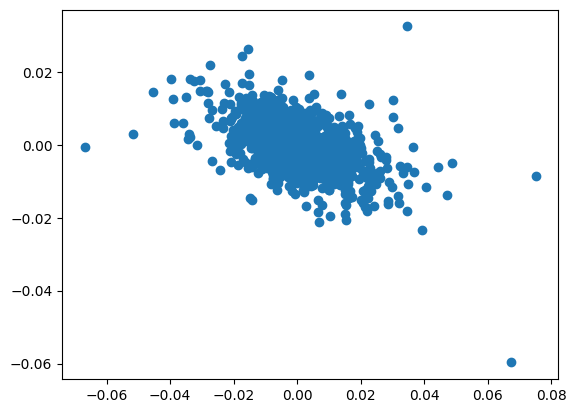

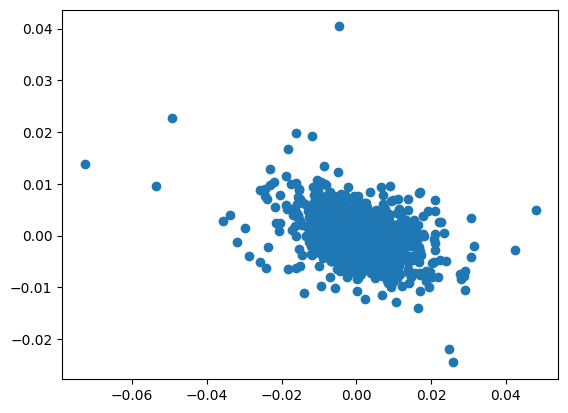

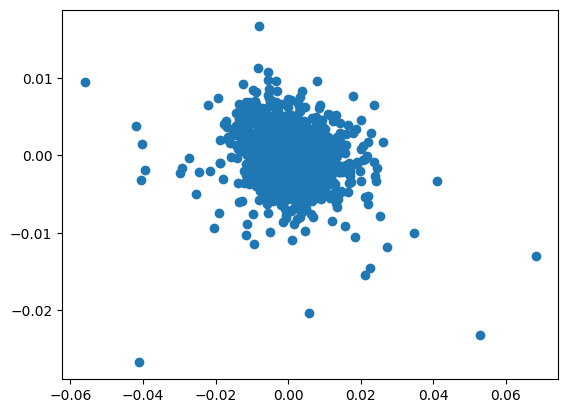

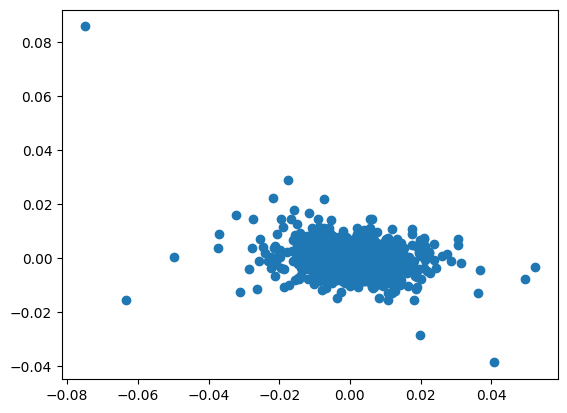

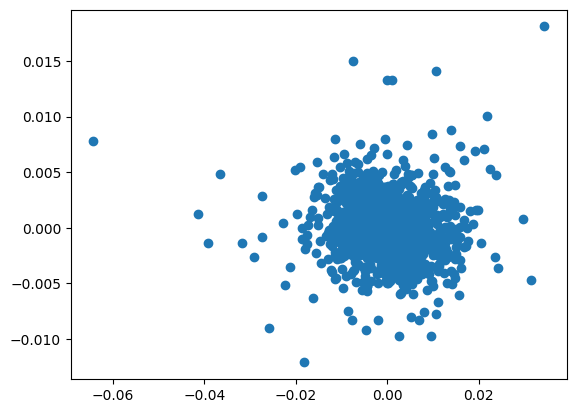

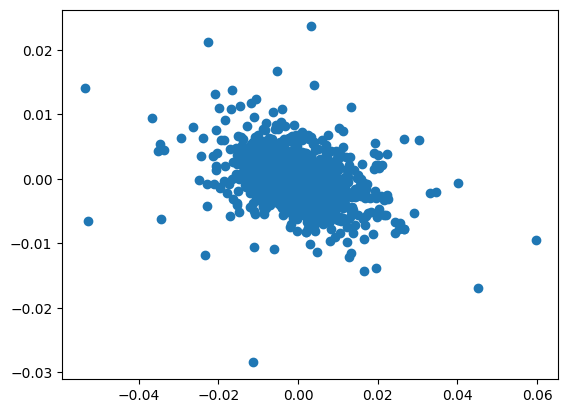

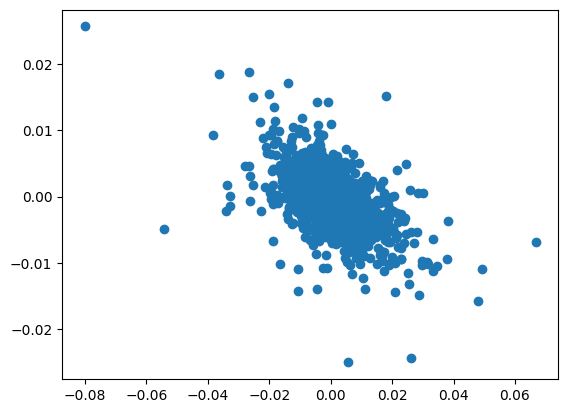

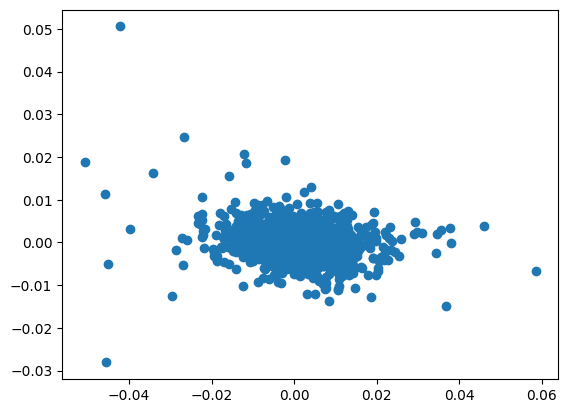

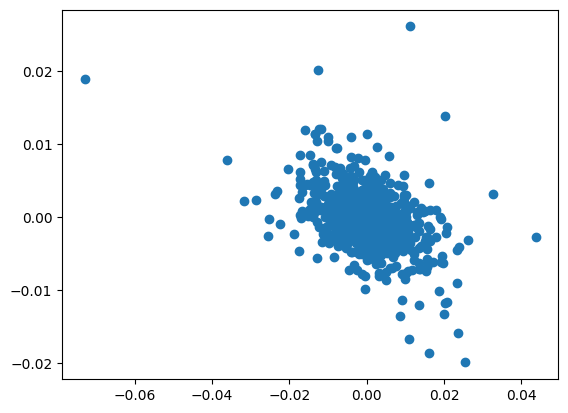

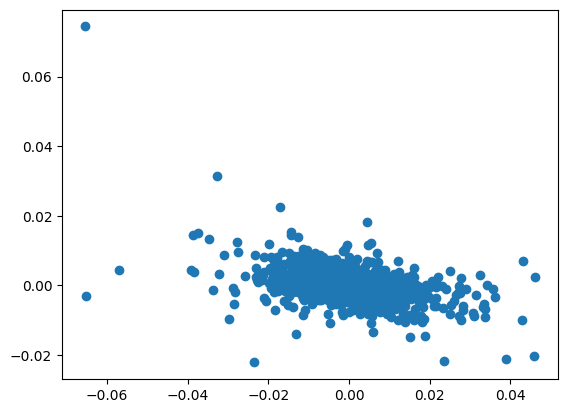

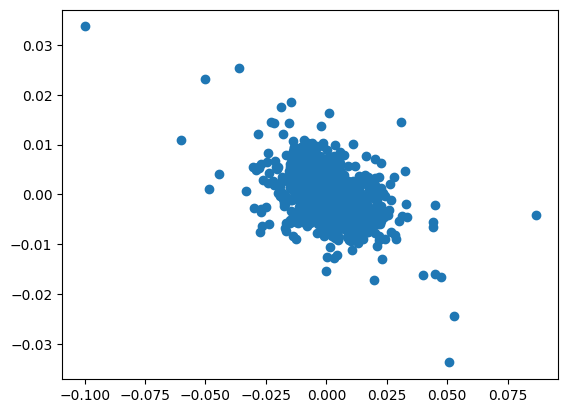

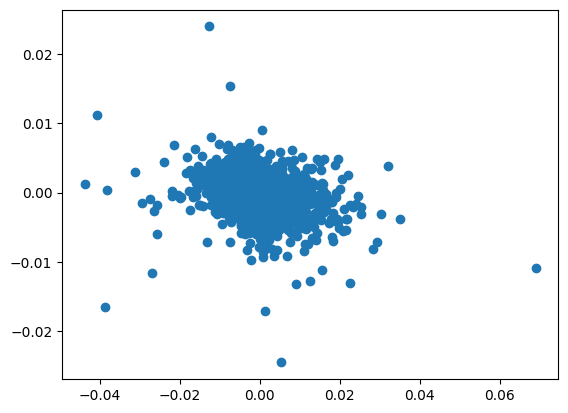

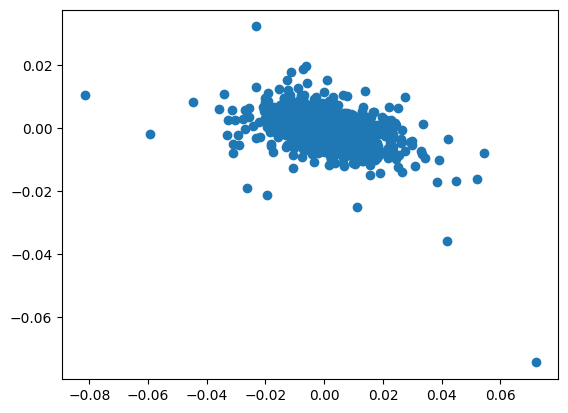

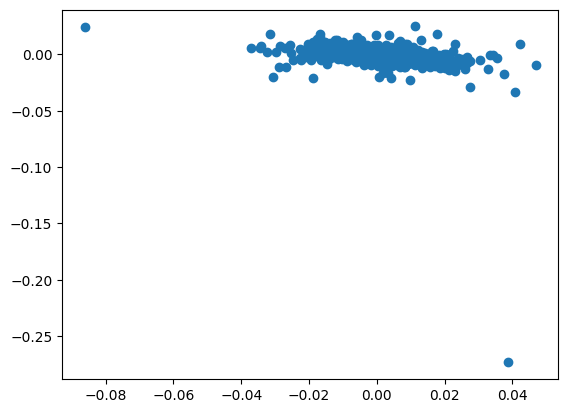

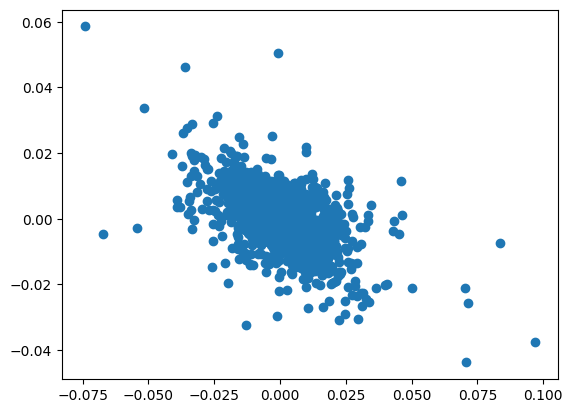

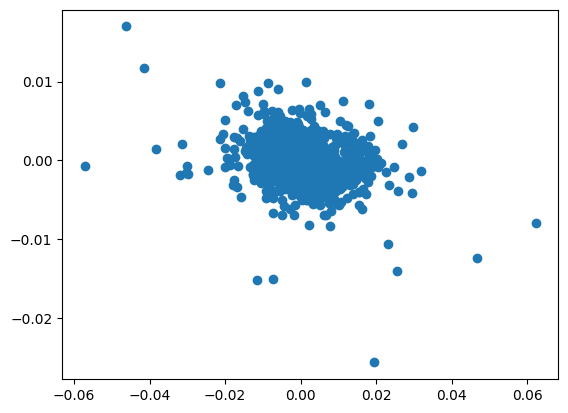

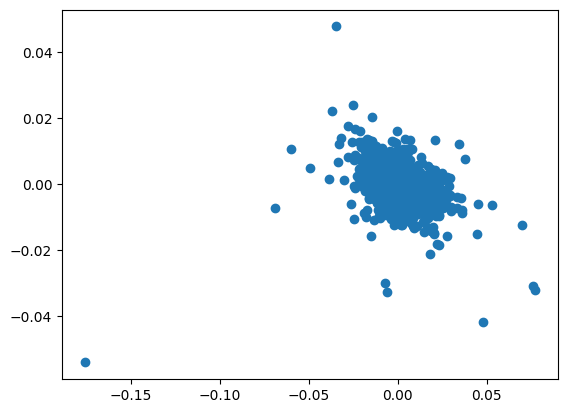

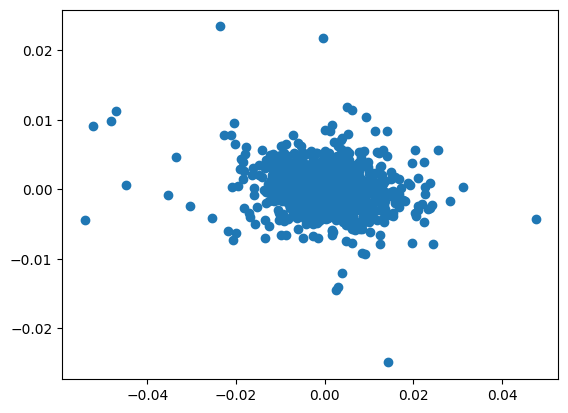

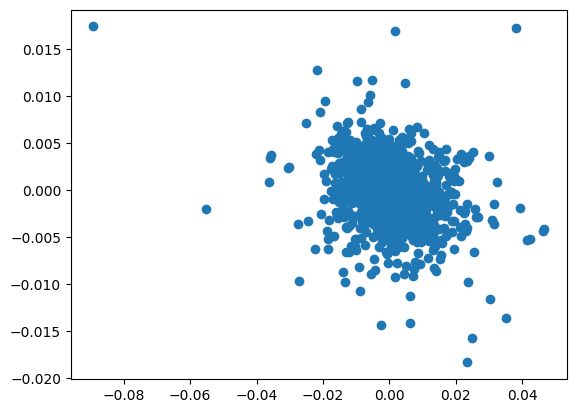

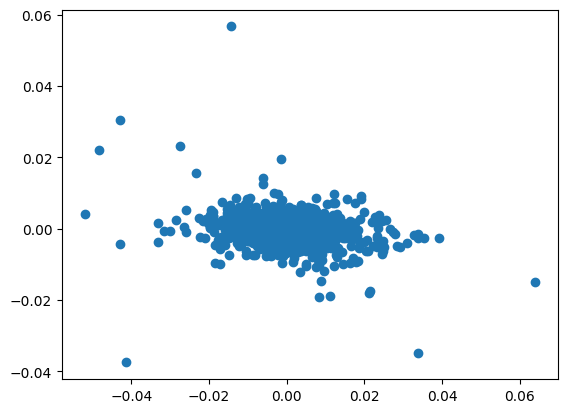

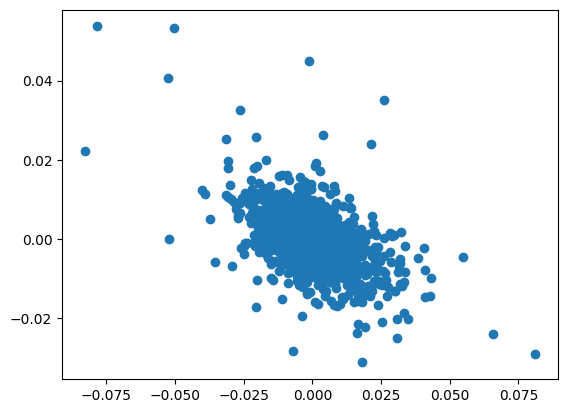

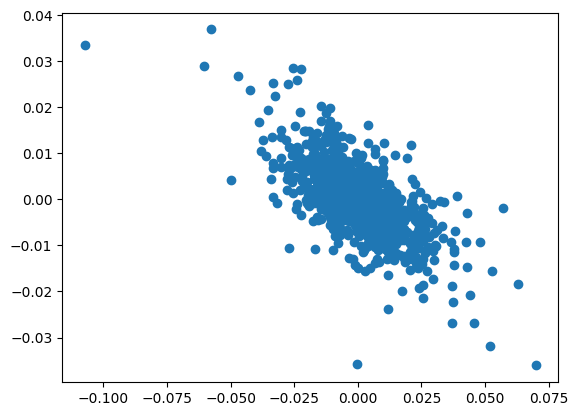

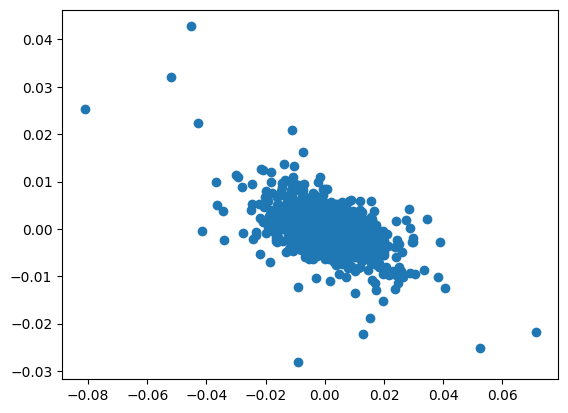

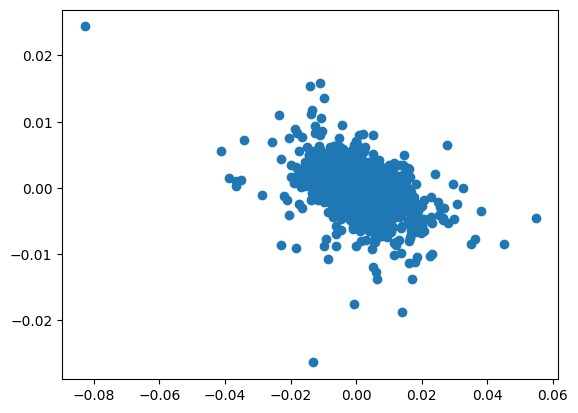

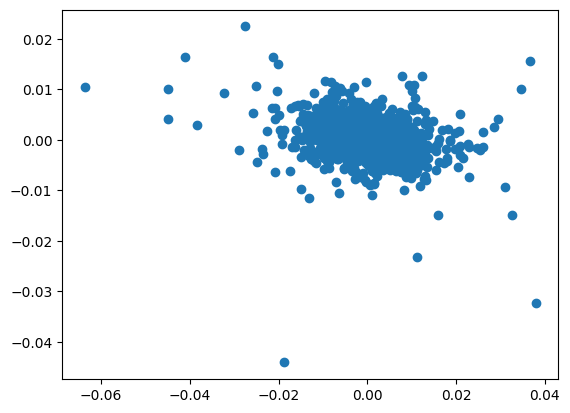

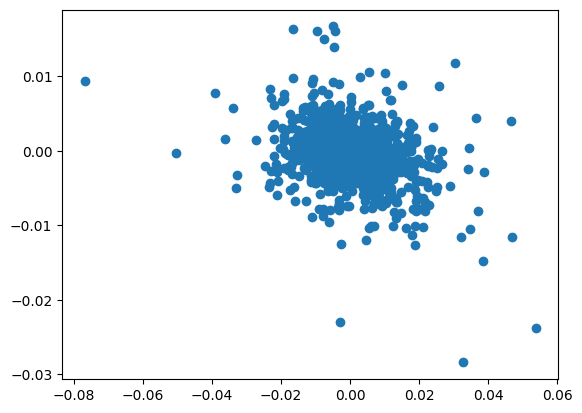

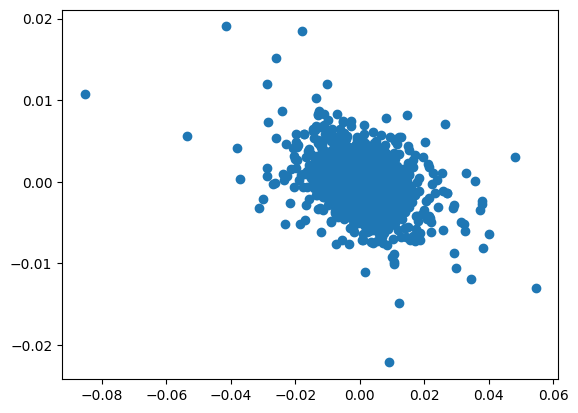

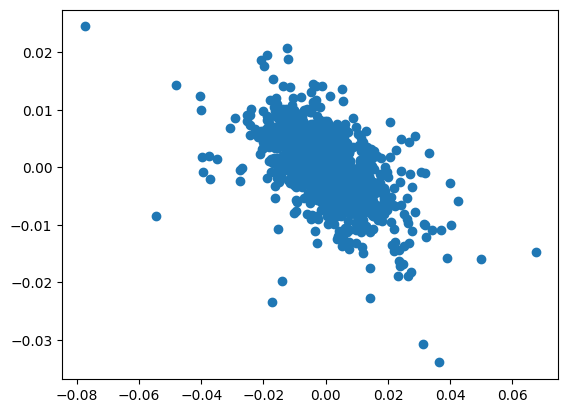

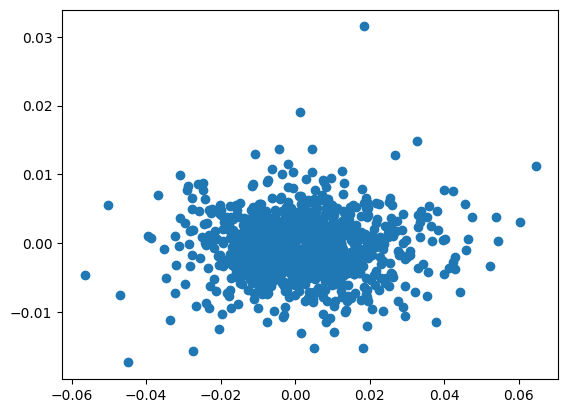

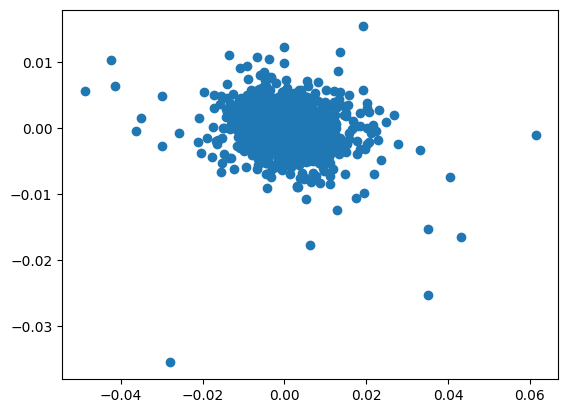

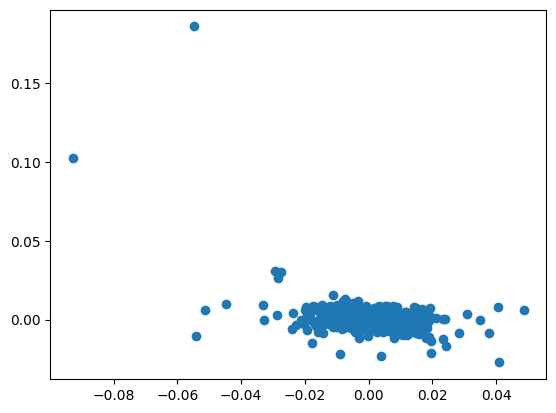

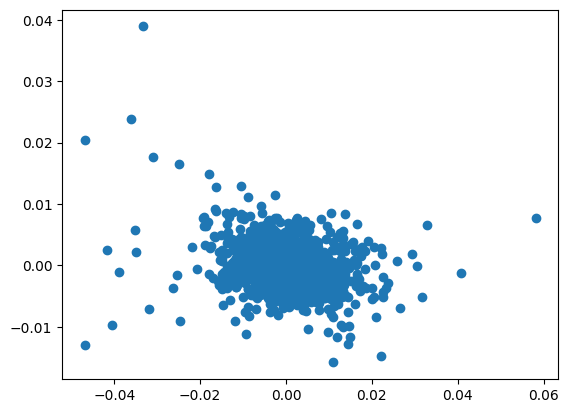

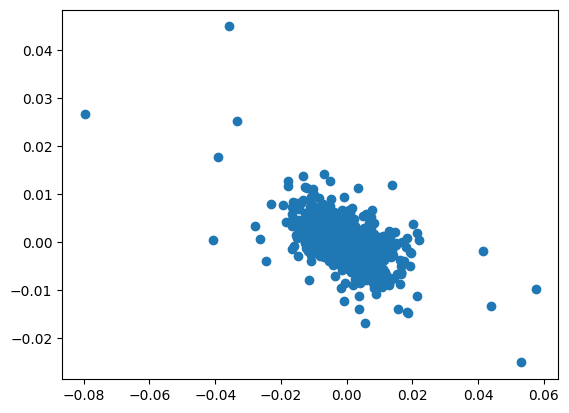

In [19]:
import matplotlib.pyplot as plt

for ticker in adr_ny_open.columns:
    pre_fut_ret = (fut_dom_close[ticker] / fut_ny_open[ticker]) - 1
    post_fut_ret = (fut_ny_close[ticker] / fut_fixed_time[ticker]) - 1
    pre_adr_ret = (adr_dom_close[ticker] / adr_ny_open[ticker]) - 1
    post_adr_ret = (adr_ny_close[ticker] / adr_fixed_time[ticker]) - 1

    pre_overperformance = pre_adr_ret - pre_fut_ret
    post_overperformance = post_adr_ret - post_fut_ret
    plt.figure()
    plt.scatter(pre_overperformance, post_overperformance)
    print(ticker, pre_overperformance.corr(post_overperformance))

HLN -0.6328796086961996
NWG -0.6699333750098163
BCS -0.7128330245117446
SAN -0.5361945471908053
SNN -0.5572223941226478
E -0.40001827098487286
TS -0.6543283575768524
AZN -0.4866580259132988
NGG -0.3809395848711799
SNY -0.36677215704681543
HSBC -0.17089206715257327
RIO -0.49822472736004036
IHG -0.6534254212482521
FMS -0.33702177834005564
SHEL -0.5646302823310252
BBVA -0.5425750710844208
DB -0.5886725211582611
DEO -0.34467113402841143
AEG -0.5636023018742871
BP -0.6146195268590027
ARGX -0.7730868728168045
RELX -0.2939821581685066
NOK -0.6922749401849694
PSO -0.2760239383881438
PHG -0.39443788915511063
BUD -0.34295901761264536
RYAAY -0.7076561262782696
ASML -0.7833912261720843
PUK -0.6923058027306209
WPP -0.5578666299592772
BTI -0.37579719972393644
ING -0.4230416901509274
SAP -0.4433772645621252
LYG -0.730233689919985
TTE -0.05076323372391982
UL -0.2662367409672989
GSK -0.5009111103871415
VOD -0.42995113823076425


/tmp/ipykernel_407732/1083678886.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


RTO -0.7488251214836633


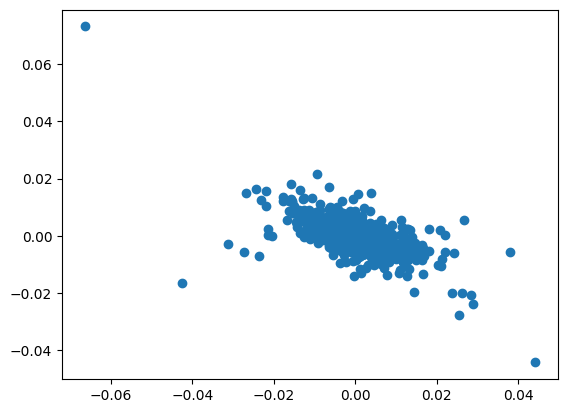

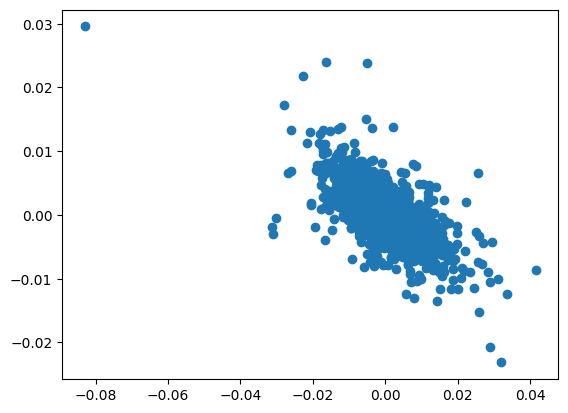

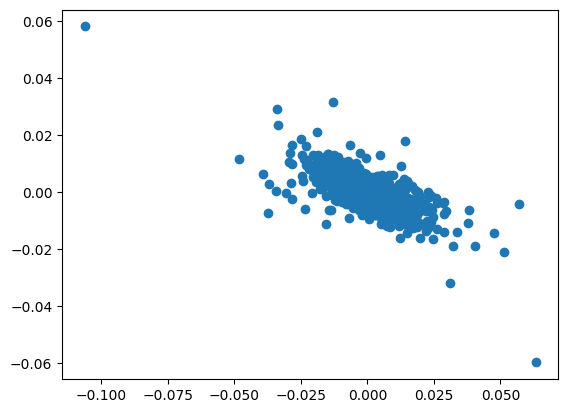

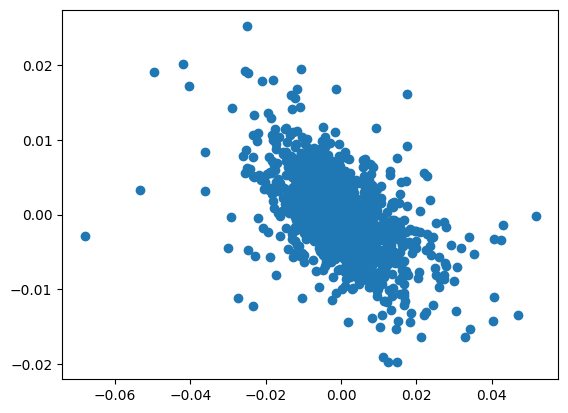

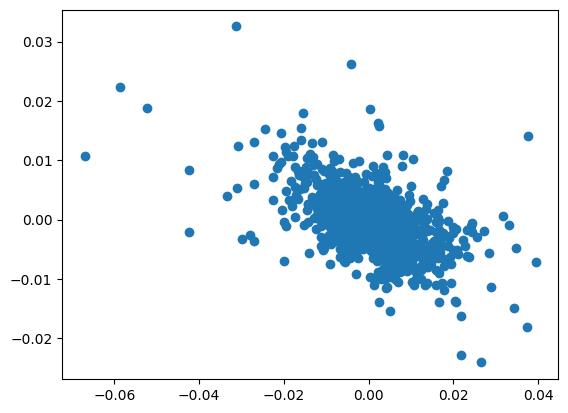

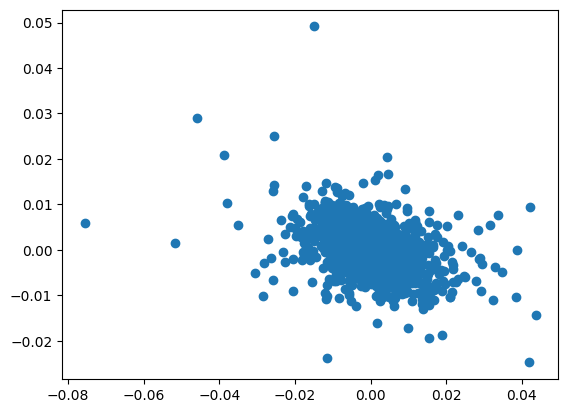

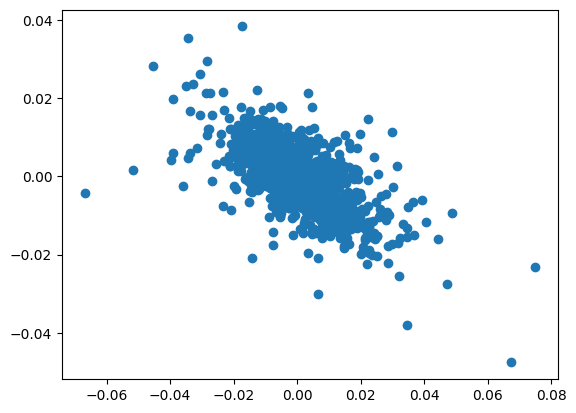

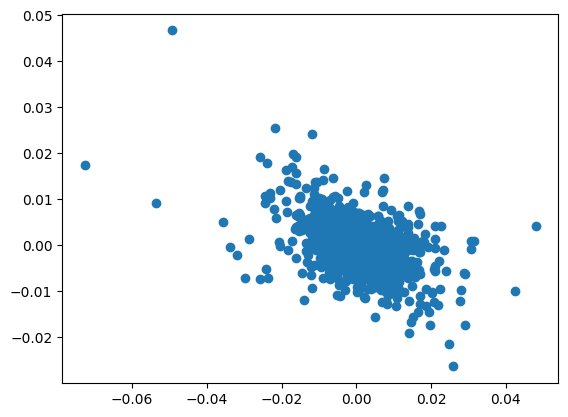

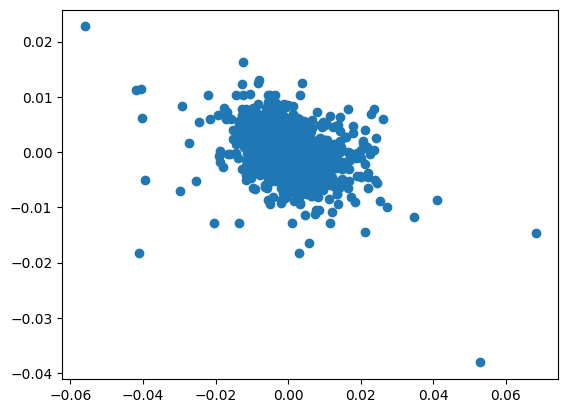

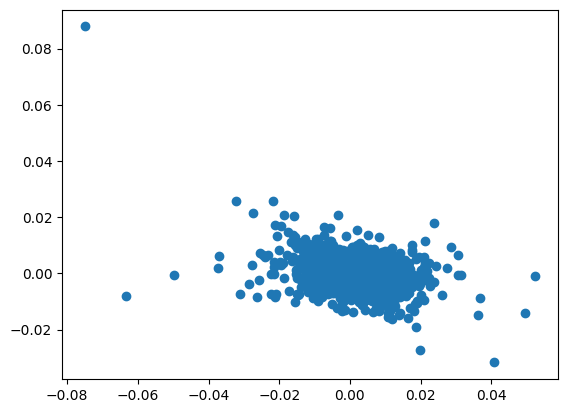

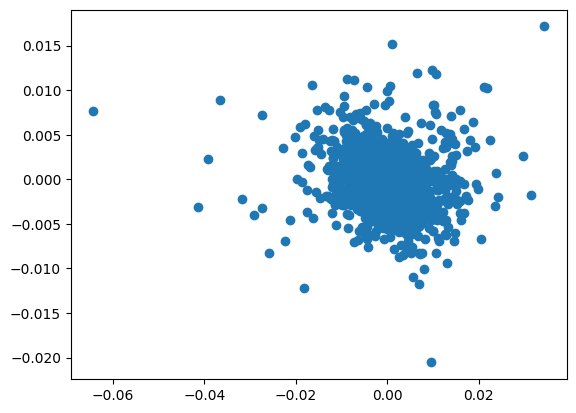

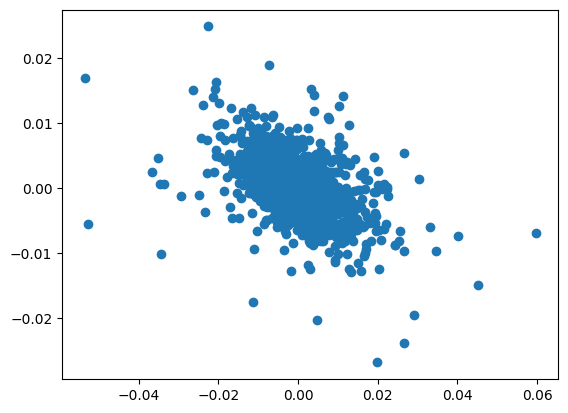

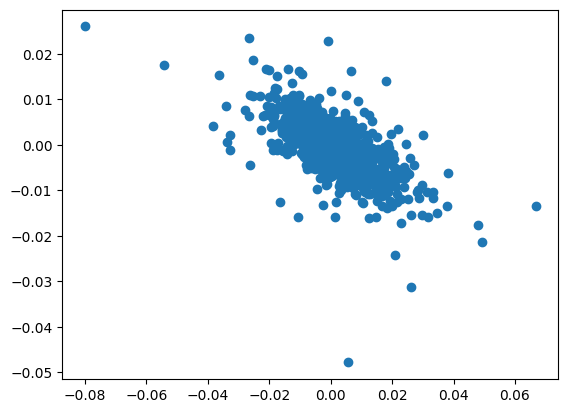

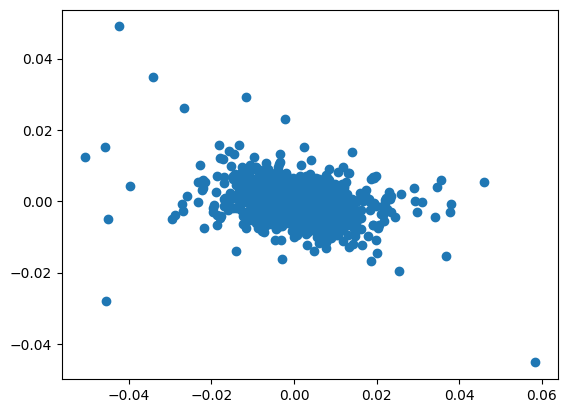

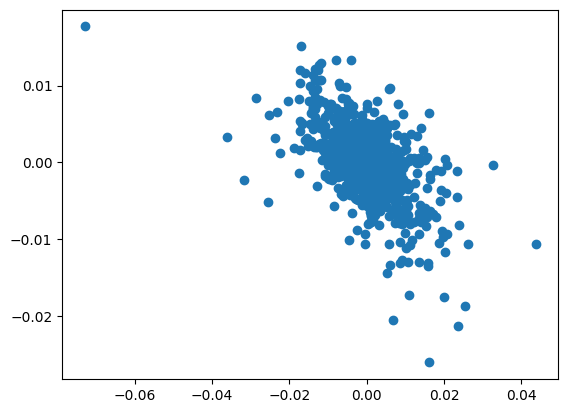

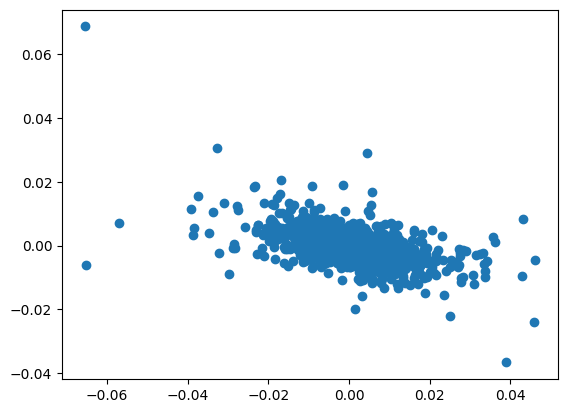

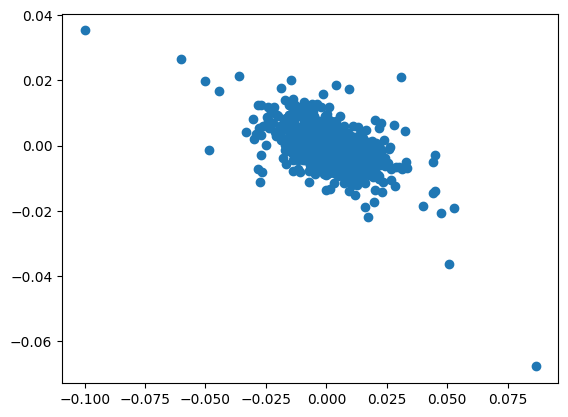

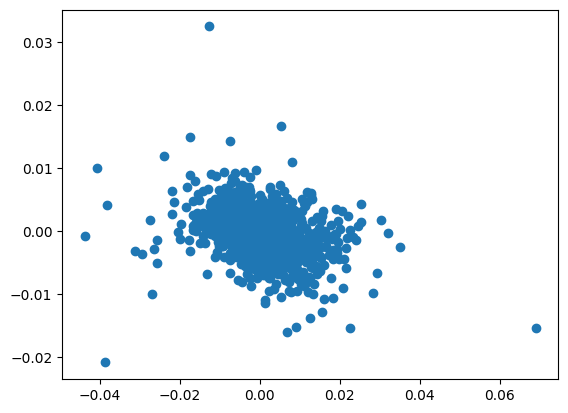

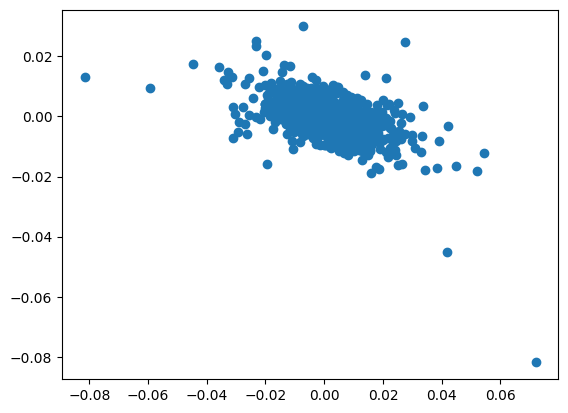

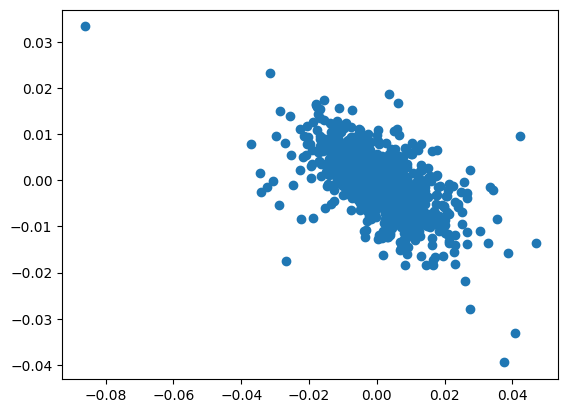

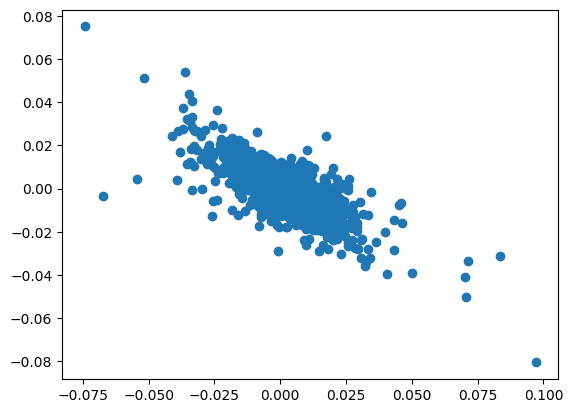

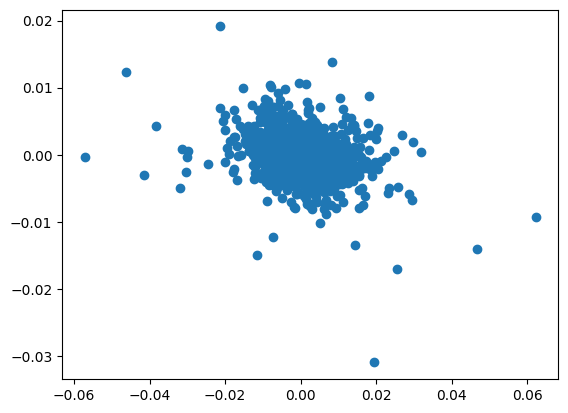

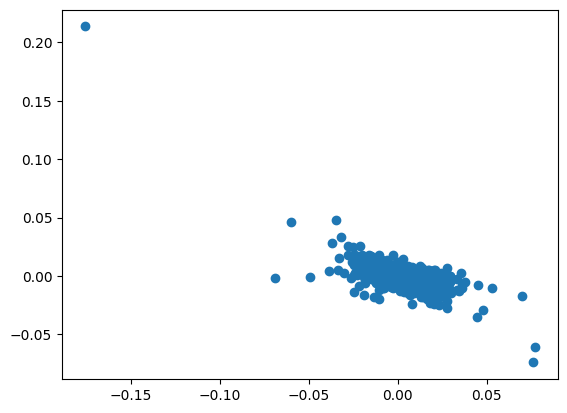

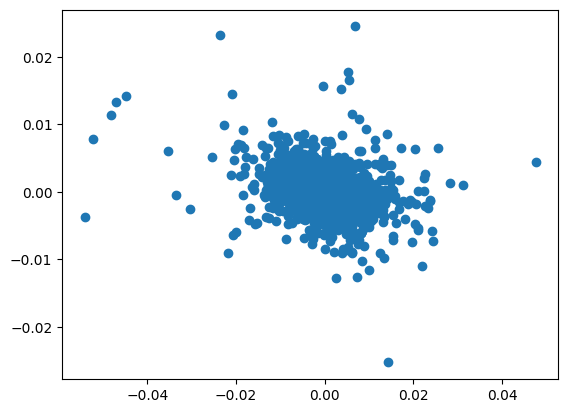

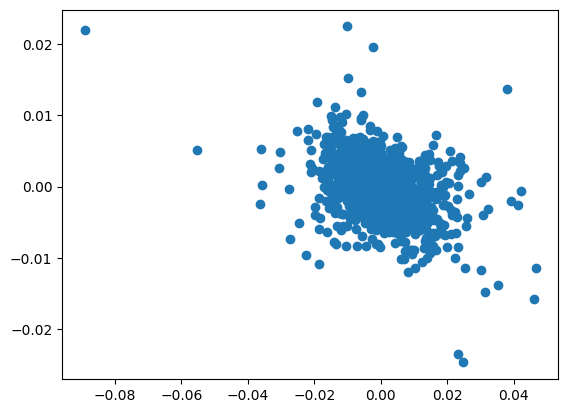

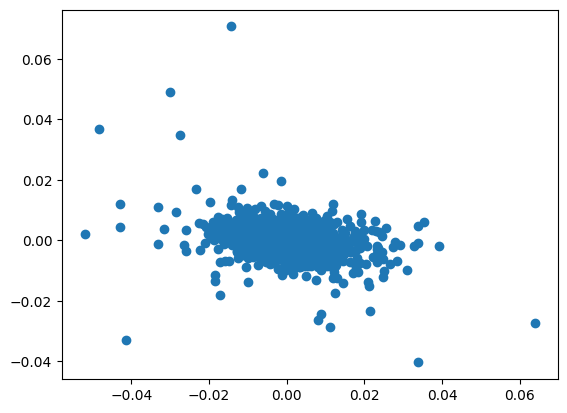

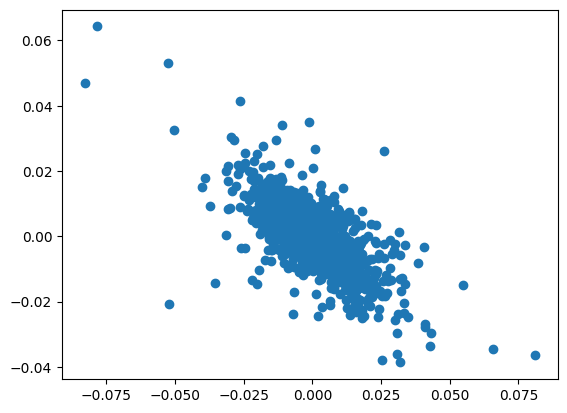

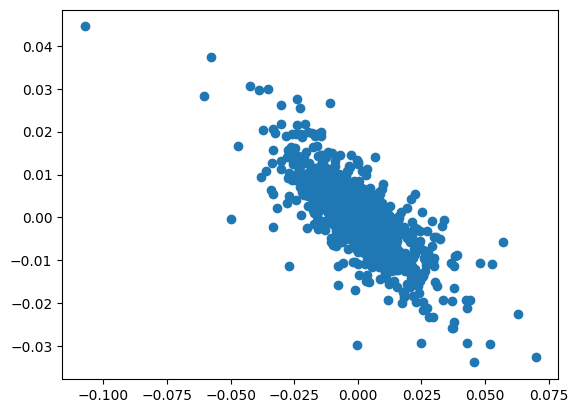

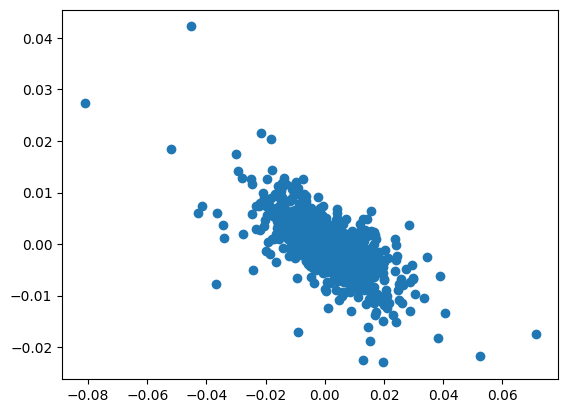

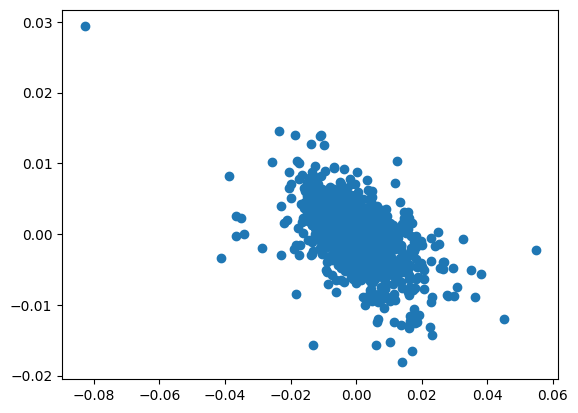

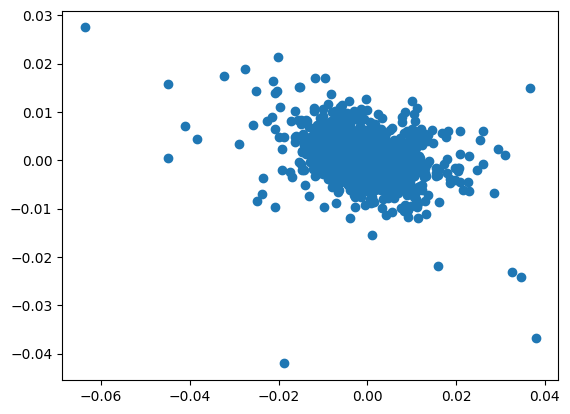

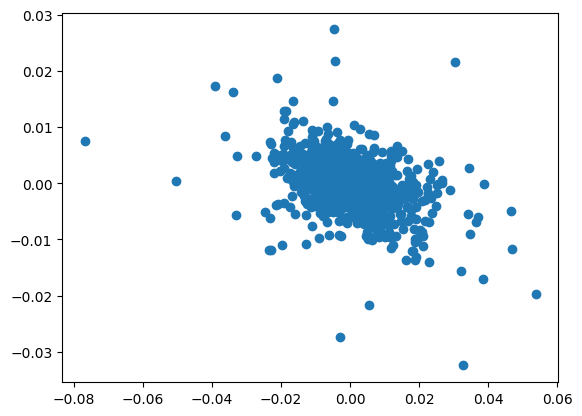

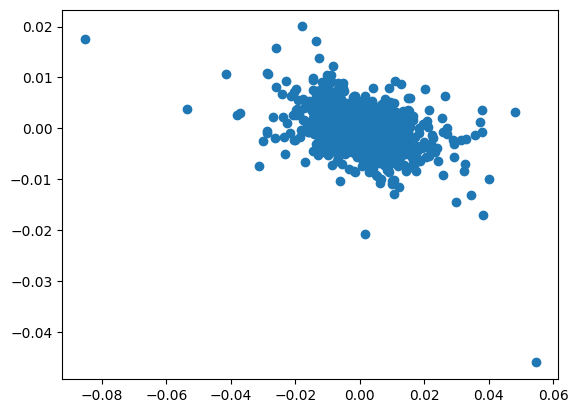

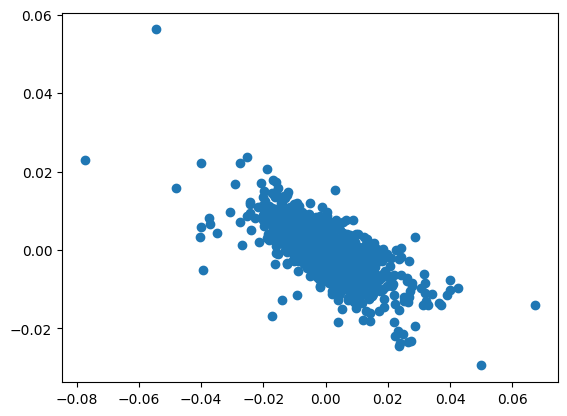

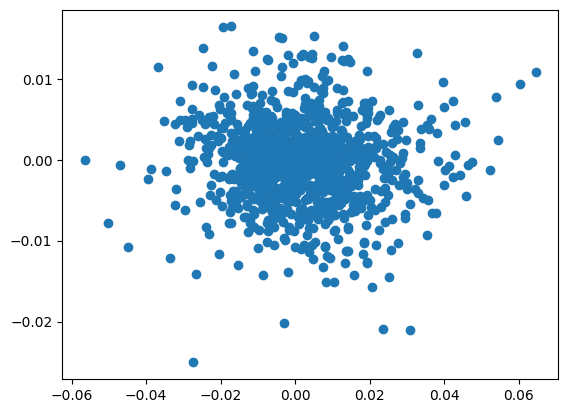

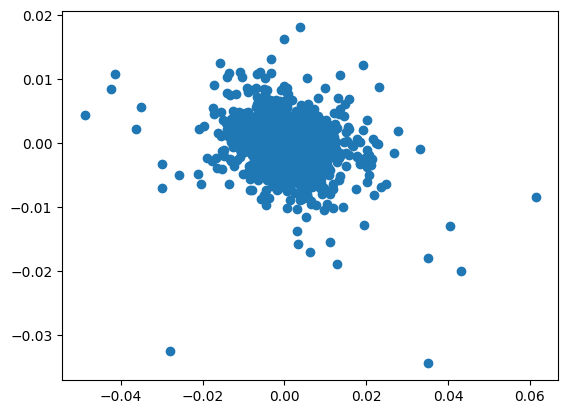

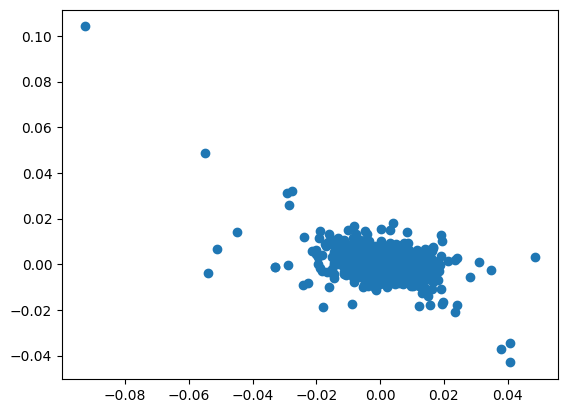

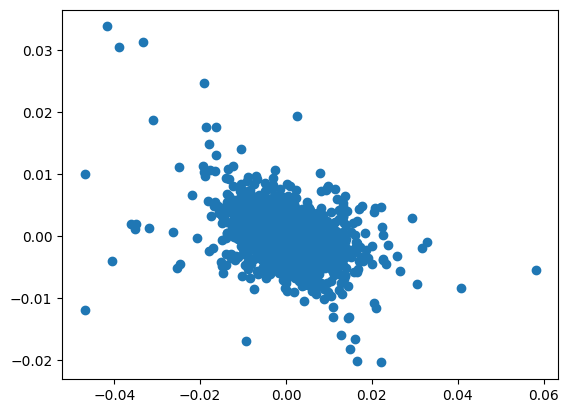

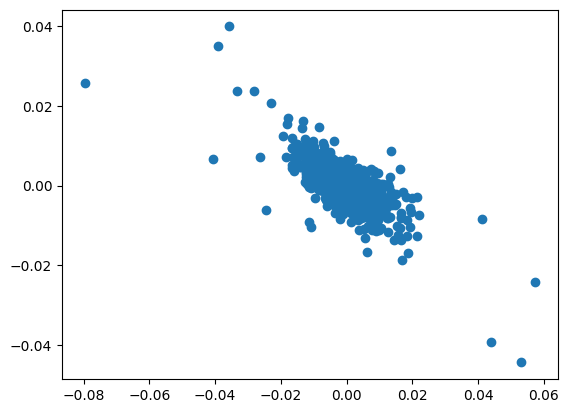

In [13]:
import matplotlib.pyplot as plt

for ticker in adr_ny_open.columns:
    pre_fut_ret = (fut_dom_close[ticker] / fut_ny_open[ticker]) - 1
    post_fut_ret = (fut_ny_close[ticker] / fut_dom_close[ticker]) - 1
    pre_adr_ret = (adr_dom_close[ticker] / adr_ny_open[ticker]) - 1
    post_adr_ret = (adr_ny_close[ticker] / adr_dom_close[ticker]) - 1

    pre_overperformance = pre_adr_ret - pre_fut_ret
    post_overperformance = post_adr_ret - post_fut_ret
    plt.figure()
    plt.scatter(pre_overperformance, post_overperformance)
    print(ticker, pre_overperformance.corr(post_overperformance))

NameError: name 'os' is not defined